**Nama Kelompok:** **HARIMAU**

**Kelas:** **S1 IF-10-4**

**Nama Anggota:**
1. Abdul Hamid Al-Ghazali (2211102251)
2. Agam Yogi Prasetyo (2211102281)
3. Muhammad Rijal Eka Farizky (2211102293)

Data: [NYC Taxi Trip](https://docs.google.com/spreadsheets/d/1Rto5CAj9ftxWCvcIT43f5Gwmf0qICv-4qbrsDDdNNFE/edit?usp=sharing)


In [14]:
# Import library yang diperlukan
import pandas as pd                # Untuk memproses dan menganalisis data tabular
import time                        # Untuk fungsi terkait waktu (Digunakan untuk mengukur waktu eksekusi algoritma)
import matplotlib.pyplot as plt    # Untuk membuat visualisasi data


# Memuat dataset
file_path = '/content/New York City Taxi Trip - Distance.csv'  # Menentukan path file dataset CSV
data = pd.read_csv(file_path)                                 # Membaca file CSV menjadi DataFrame menggunakan pandas

# Mengekstrak kolom yang relevan
trip_durations = (data['trip_duration']          # Mengakses kolom 'trip_duration' dari DataFrame
                  .dropna()                      # Menghapus nilai NaN (data yang kosong atau tidak valid)
                  .astype(int)                   # Mengonversi nilai-nilai kolom menjadi tipe integer
                  .tolist())                     # Mengonversi kolom menjadi daftar Python


**Dynamic Programming**

DP - Input size 10: 0.0110 seconds
DP - Input size 100: 0.0941 seconds
DP - Input size 1000: 0.8365 seconds
DP - Input size 5000: 6.0729 seconds
DP - Input size 10000: 8.9948 seconds


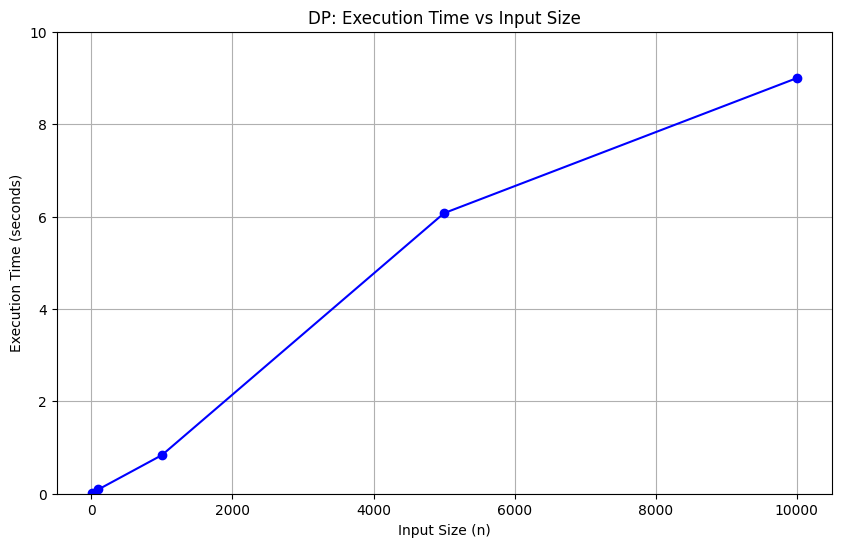


Hasil Analisis Waktu Eksekusi:
 Ukuran Input  Waktu Eksekusi (detik)
          10              0.010971
         100              0.094108
        1000              0.836467
        5000              6.072889
        10000              8.994828


In [16]:
# Fungsi untuk Dynamic Programming (DP)
def subset_sum_dp(arr, target):
    # Inisialisasi tabel DP
    n = len(arr)  # Panjang array
    dp = [[False] * (target + 1) for _ in range(n + 1)]
    # `dp[i][t]` menunjukkan apakah mungkin mendapatkan jumlah `t` dengan elemen pertama hingga elemen ke-`i`.

    dp[0][0] = True  # Jumlah 0 selalu bisa dicapai dengan subset kosong.

    # Mengisi tabel DP
    for i in range(1, n + 1):  # Iterasi elemen array
        for t in range(target + 1):  # Iterasi untuk setiap target dari 0 hingga target
            if arr[i - 1] <= t:
                # Jika elemen `arr[i-1]` dapat dimasukkan (nilainya ≤ `t`),
                # maka periksa apakah mungkin mencapai `t` dengan atau tanpa elemen ini.
                dp[i][t] = dp[i - 1][t] or dp[i - 1][t - arr[i - 1]]
            else:
                # Jika elemen `arr[i-1]` tidak bisa dimasukkan (nilainya > `t`),
                # cukup bawa nilai dari sebelumnya (`dp[i-1][t]`).
                dp[i][t] = dp[i - 1][t]

    # Jika target tidak dapat dicapai, kembalikan None
    if not dp[n][target]:
        return None

    # Backtrack untuk menemukan subset
    subset = []  # Menyimpan elemen-elemen subset yang ditemukan
    i, t = n, target  # Mulai dari elemen terakhir dan target
    while i > 0 and t > 0:
        if dp[i][t] and not dp[i - 1][t]:
            # Jika elemen ini termasuk dalam subset,
            # tambahkan elemen tersebut dan kurangi nilai target.
            subset.append(arr[i - 1])
            t -= arr[i - 1]
        i -= 1  # Pindah ke elemen sebelumnya.

    return subset  # Kembalikan subset yang ditemukan

# Analisis waktu eksekusi untuk DP
input_sizes = [10, 100, 1000, 5000, 10000]  # Daftar ukuran input untuk pengujian
running_times_dp = []  # Menyimpan hasil waktu eksekusi

for size in input_sizes:  # Iterasi untuk setiap ukuran input
    test_data = trip_durations[:size]  # Ambil subset data dari `trip_durations` sesuai ukuran input
    target_sum = sum(test_data[:5])  # Contoh target: jumlah dari 5 elemen pertama
    start_time = time.time()  # Catat waktu mulai
    result = subset_sum_dp(test_data, target_sum)  # Jalankan DP dengan data uji dan target
    end_time = time.time()  # Catat waktu selesai
    running_time = end_time - start_time  # Hitung waktu eksekusi
    running_times_dp.append((size, running_time))  # Simpan hasil (ukuran input, waktu eksekusi)
    print(f"DP - Input size {size}: {running_time:.4f} seconds")  # Tampilkan hasil di konsol

# Plot hasil DP
plt.figure(figsize=(10, 6))  # Buat figur dengan ukuran tertentu
plt.plot(input_sizes, [rt[1] for rt in running_times_dp], marker='o', linestyle='-', color='b')
# Buat grafik: sumbu x = ukuran input, sumbu y = waktu eksekusi, marker berbentuk lingkaran, warna biru
plt.title('DP: Execution Time vs Input Size')  # Judul grafik
plt.xlabel('Input Size (n)')  # Label sumbu x
plt.ylabel('Execution Time (seconds)')  # Label sumbu y
plt.grid(True)  # Tambahkan grid untuk memperjelas grafik
plt.ylim(0, 10)  # Mengatur rentang waktu eksekusi (maksimum 10 detik)
plt.show()  # Tampilkan grafik

# Menampilkan analisis waktu eksekusi dalam format tabel
print("\nHasil Analisis Waktu Eksekusi:")  # Header output tabel
print(" Ukuran Input  Waktu Eksekusi (detik)")  # Header kolom tabel
for size, runtime in running_times_dp:  # Iterasi untuk setiap hasil waktu eksekusi
    print(f"        {size:4d}            {runtime:10.6f}")  # Tampilkan ukuran input dan waktu eksekusi dalam format rapi


**Algoritma DFS**

DFS - Input size 10: 0.0000 seconds
DFS - Input size 100: 0.0001 seconds
DFS - Input size 1000: 0.0012 seconds
DFS - Input size 5000: 0.0047 seconds
DFS - Input size 10000: 0.0082 seconds


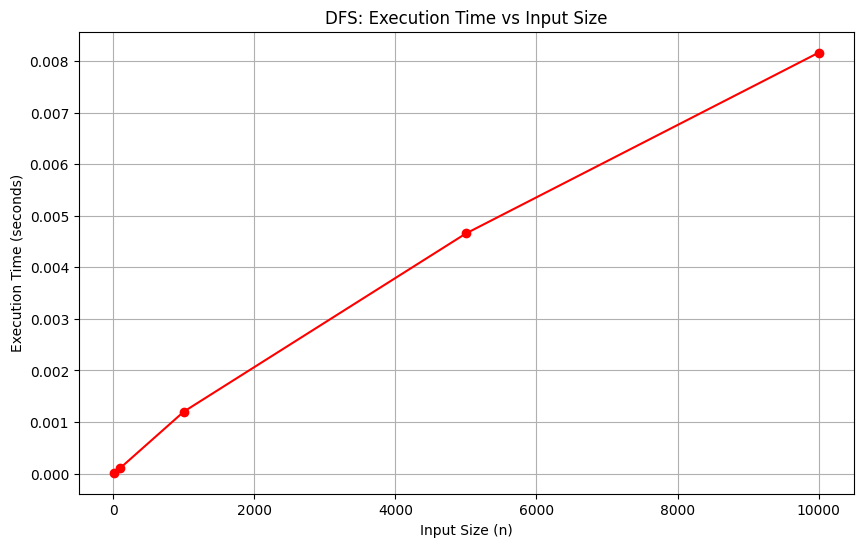


Hasil Analisis Waktu Eksekusi:
 Ukuran Input  Waktu Eksekusi (detik)
          10              0.000015
         100              0.000108
        1000              0.001201
        5000              0.004656
        10000              0.008162


In [23]:
# Fungsi untuk Depth-First Search (DFS)
def dfs(arr, target):
    stack = [(0, [])]  # Inisialisasi stack dengan tuple (indeks saat ini, jalur saat ini)
    while stack:  # Loop sampai stack kosong
        index, path = stack.pop()  # Ambil elemen terakhir dari stack (LIFO)
        if index == len(arr):  # Jika indeks mencapai panjang array
            return path if sum(path) == target else None  # Jika jumlah jalur sama dengan target, kembalikan jalur
        if index < len(arr):  # Jika indeks masih dalam batas array
            stack.append((index + 1, path + [arr[index]]))  # Masukkan elemen ke jalur saat ini
            stack.append((index + 1, path))  # Lewati elemen saat ini (tidak masukkan ke jalur)

# Analisis waktu eksekusi untuk DFS
input_sizes = [10, 100, 1000, 5000, 10000]  # Ukuran input yang berbeda untuk pengujian
running_times_dfs = []  # Menyimpan hasil waktu eksekusi

for size in input_sizes:  # Iterasi untuk setiap ukuran input
    test_data = trip_durations[:size]  # Ambil subset data trip_durations sesuai ukuran input
    target_sum = sum(test_data[:5])  # Contoh target: jumlah dari 5 elemen pertama
    start_time = time.time()  # Catat waktu mulai
    dfs(test_data, target_sum)  # Jalankan fungsi DFS dengan data uji dan target
    end_time = time.time()  # Catat waktu selesai
    running_time = end_time - start_time  # Hitung waktu eksekusi
    running_times_dfs.append((size, running_time))  # Simpan hasil (ukuran input, waktu eksekusi)
    print(f"DFS - Input size {size}: {running_time:.4f} seconds")  # Tampilkan hasil di konsol

# Plot hasil DFS
plt.figure(figsize=(10, 6))  # Buat figur dengan ukuran tertentu
plt.plot(input_sizes, [rt[1] for rt in running_times_dfs], marker='o', linestyle='-', color='r')
# Buat grafik: sumbu x = ukuran input, sumbu y = waktu eksekusi, dengan marker berbentuk lingkaran
plt.title('DFS: Execution Time vs Input Size')  # Judul grafik
plt.xlabel('Input Size (n)')  # Label sumbu x
plt.ylabel('Execution Time (seconds)')  # Label sumbu y
plt.grid(True)  # Tambahkan grid untuk memperjelas grafik
plt.show()  # Tampilkan grafik

# Menampilkan analisis waktu eksekusi dalam format tabel
print("\nHasil Analisis Waktu Eksekusi:")  # Tampilkan header
print(" Ukuran Input  Waktu Eksekusi (detik)")  # Header tabel
for size, runtime in running_times_dfs:  # Iterasi untuk setiap hasil waktu eksekusi
    print(f"        {size:4d}            {runtime:10.6f}")  # Tampilkan ukuran input dan waktu eksekusi dengan format rapi


**Algoritma Branch & Bound**

Branch and Bound - Input size 10: 0.0001 seconds
Branch and Bound - Input size 100: 0.0001 seconds
Branch and Bound - Input size 1000: 0.0004 seconds
Branch and Bound - Input size 5000: 0.0015 seconds
Branch and Bound - Input size 10000: 0.0027 seconds


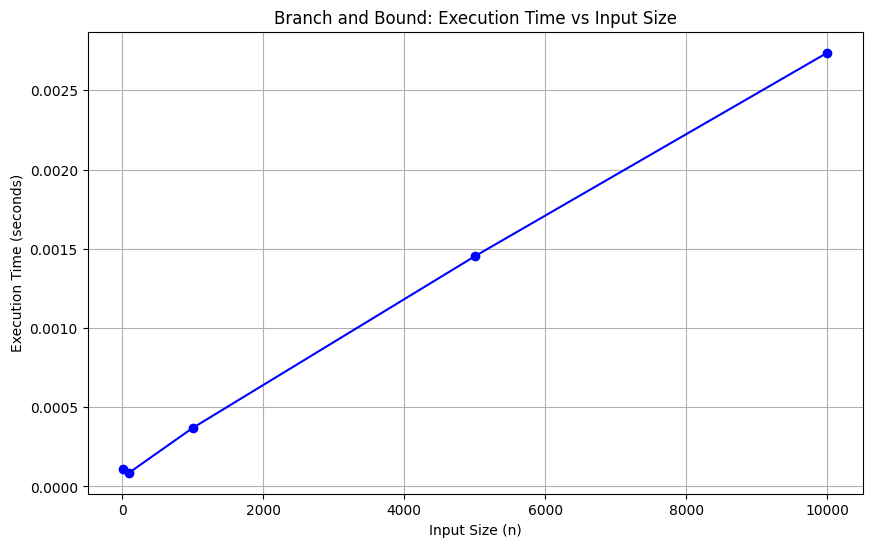


Hasil Analisis Waktu Eksekusi:
 Ukuran Input  Waktu Eksekusi (detik)
          10              0.000113
         100              0.000087
        1000              0.000369
        5000              0.001452
        10000              0.002737


In [21]:
# Fungsi untuk Branch and Bound
# Definisi kelas Node untuk menyimpan informasi setiap node dalam Branch and Bound
class Node:
    def __init__(self, level, value, bound):
        self.level = level  # Level dalam tree (indeks elemen saat ini dalam array)
        self.value = value  # Nilai total dari subset saat ini
        self.bound = bound  # Nilai bound (estimasi batas atas nilai terbaik yang dapat dicapai dari node ini)

# Fungsi untuk Branch and Bound
def branch_and_bound(arr, target):
    # Fungsi untuk menghitung bound (batas atas nilai) untuk sebuah node
    def bound(node):
        if node.level >= len(arr):  # Jika node sudah melampaui array, tidak ada elemen yang bisa ditambahkan
            return 0
        return node.value + sum(arr[node.level:])  # Hitung nilai saat ini + elemen yang tersisa di array

    # Inisialisasi queue dan node root
    queue = []  # Queue untuk menyimpan node yang akan dieksplorasi
    root = Node(0, 0, 0)  # Root dimulai pada level 0, nilai 0, dan bound 0
    root.bound = bound(root)  # Hitung bound untuk root
    queue.append(root)  # Tambahkan root ke dalam queue
    max_value = 0  # Variabel untuk melacak nilai maksimum yang ditemukan

    # Proses eksplorasi node
    while queue:  # Loop sampai queue kosong
        node = queue.pop(0)  # Ambil node pertama dari queue
        if node.level < len(arr) and node.bound > max_value:  # Hanya eksplorasi jika bound > max_value
            # Node kiri: masukkan elemen saat ini ke subset
            left = Node(node.level + 1, node.value + arr[node.level], 0)  # Tambahkan elemen ke nilai saat ini
            left.bound = bound(left)  # Hitung bound untuk node kiri
            if left.value == target:  # Jika nilai saat ini sama dengan target, kembalikan nilai
                return left.value
            if left.bound > max_value:  # Jika bound node kiri lebih besar dari max_value, tambahkan ke queue
                queue.append(left)

            # Node kanan: lewati elemen saat ini
            right = Node(node.level + 1, node.value, 0)  # Tidak menambahkan elemen ke nilai saat ini
            right.bound = bound(right)  # Hitung bound untuk node kanan
            if right.bound > max_value:  # Jika bound node kanan lebih besar dari max_value, tambahkan ke queue
                queue.append(right)

# Analisis waktu eksekusi untuk Branch and Bound
input_sizes = [10, 100, 1000, 5000, 10000]  # Daftar ukuran input untuk pengujian
running_times_bb = []  # Menyimpan hasil waktu eksekusi

for size in input_sizes:  # Iterasi untuk setiap ukuran input
    test_data = trip_durations[:size]  # Ambil subset data dari `trip_durations` sesuai ukuran input
    target_sum = sum(test_data[:5])  # Contoh target: jumlah dari 5 elemen pertama
    start_time = time.time()  # Catat waktu mulai
    branch_and_bound(test_data, target_sum)  # Jalankan algoritma Branch and Bound
    end_time = time.time()  # Catat waktu selesai
    running_time = end_time - start_time  # Hitung waktu eksekusi
    running_times_bb.append((size, running_time))  # Simpan hasil (ukuran input, waktu eksekusi)
    print(f"Branch and Bound - Input size {size}: {running_time:.4f} seconds")  # Tampilkan hasil di konsol

# Plot hasil Branch and Bound
plt.figure(figsize=(10, 6))  # Buat figur dengan ukuran tertentu
plt.plot(input_sizes, [rt[1] for rt in running_times_bb], marker='o', linestyle='-', color='b')
# Buat grafik: sumbu x = ukuran input, sumbu y = waktu eksekusi, marker berbentuk lingkaran, warna biru
plt.title('Branch and Bound: Execution Time vs Input Size')  # Judul grafik
plt.xlabel('Input Size (n)')  # Label sumbu x
plt.ylabel('Execution Time (seconds)')  # Label sumbu y
plt.grid(True)  # Tambahkan grid untuk memperjelas grafik
plt.show()  # Tampilkan grafik

# Menampilkan analisis waktu eksekusi dalam format tabel
print("\nHasil Analisis Waktu Eksekusi:")  # Header output tabel
print(" Ukuran Input  Waktu Eksekusi (detik)")  # Header kolom tabel
for size, runtime in running_times_bb:  # Iterasi untuk setiap hasil waktu eksekusi
    print(f"        {size:4d}            {runtime:10.6f}")  # Tampilkan ukuran input dan waktu eksekusi dalam format rapi
